<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/CeasarianV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('white')

url = r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/Caesarian%20Section%20Classification%20Dataset(CSV).csv'

In [ ]:
data = pd.read_csv(url)

data.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


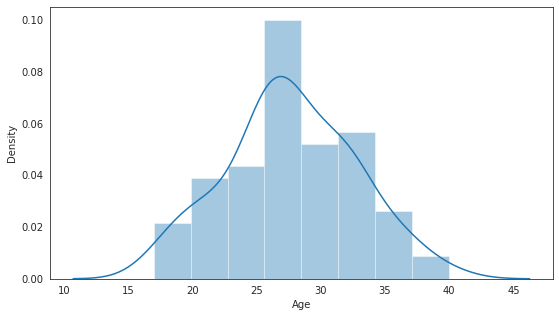

In [ ]:
plt.figure(figsize=(9,5))

sns.distplot(data.Age)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


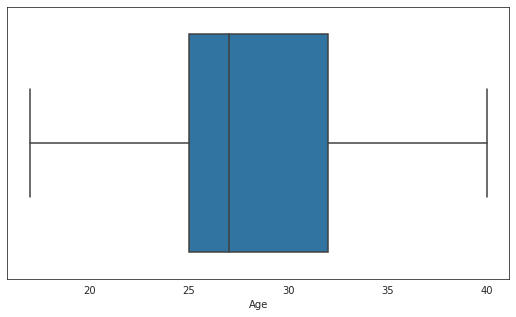

In [ ]:
plt.figure(figsize=(9,5))

sns.boxplot(data.Age)
plt.show()

In [ ]:
data.Caesarian = [i.lower() for i in data.Caesarian]

In [116]:
data.Caesarian

0      no
1     yes
2      no
3      no
4     yes
     ... 
75     no
76    yes
77    yes
78    yes
79     no
Name: Caesarian, Length: 80, dtype: object

In [ ]:
print(data.info())
print('-'*100)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivey No         80 non-null     int64 
 2   Delivery No        80 non-null     object
 3   Blood of Pressure  80 non-null     object
 4   Heart Problem      80 non-null     object
 5   Caesarian          80 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB
None
----------------------------------------------------------------------------------------------------
             Age  Delivey No
count  80.000000   80.000000
mean   27.687500    1.662500
std     5.017927    0.794662
min    17.000000    1.000000
25%    25.000000    1.000000
50%    27.000000    1.000000
75%    32.000000    2.000000
max    40.000000    4.000000


In [ ]:
data['Delivey No'].unique(), data['Delivery No'].unique()

(array([1, 2, 3, 4]),
 array(['Timely', 'Premature', 'Latecomer'], dtype=object))

In [ ]:
data['Delivey No'].value_counts()

1    41
2    27
3    10
4     2
Name: Delivey No, dtype: int64

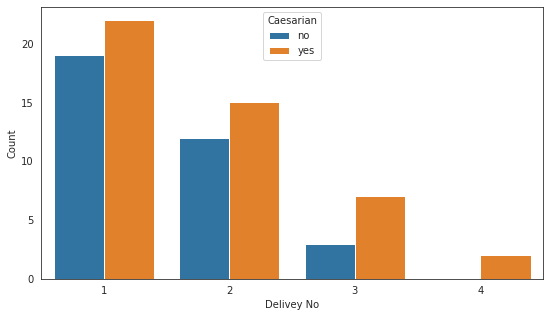

In [ ]:
delivey_group = data.groupby(['Delivey No', 'Caesarian']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Delivey No', y='Count', hue='Caesarian', data=delivey_group)
plt.show()

In [ ]:
data['Delivery No'].value_counts()

Timely       46
Premature    17
Latecomer    17
Name: Delivery No, dtype: int64

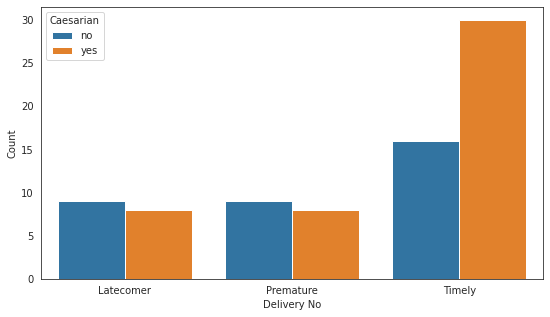

In [ ]:
delivery_group = data.groupby(['Caesarian', 'Delivery No']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Delivery No', y='Count', hue='Caesarian', data=delivery_group)
plt.show()

In [ ]:
data['Blood of Pressure'] = [i.lower() for i in data['Blood of Pressure']]

In [ ]:
data['Blood of Pressure'].value_counts()

normal    40
low       20
high      20
Name: Blood of Pressure, dtype: int64

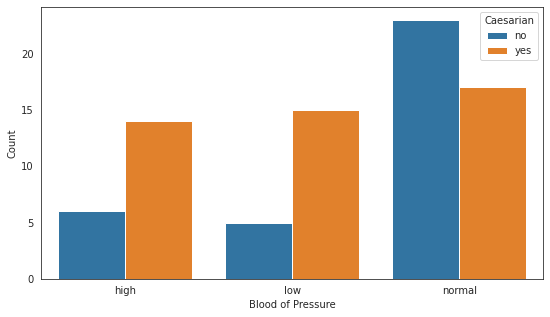

In [ ]:
blood_group = data.groupby(['Blood of Pressure', 'Caesarian']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Blood of Pressure', y='Count', hue='Caesarian', data=blood_group)
plt.show()

In [ ]:
data['Heart Problem'].value_counts()

apt      50
inept    30
Name: Heart Problem, dtype: int64

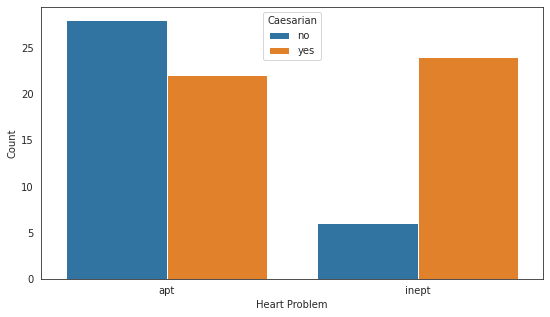

In [ ]:
heart_group = data.groupby(['Heart Problem', 'Caesarian']).size().reset_index(name='Count')

plt.figure(figsize=(9,5))

sns.barplot(x='Heart Problem', y='Count', hue='Caesarian', data=heart_group)
plt.show()

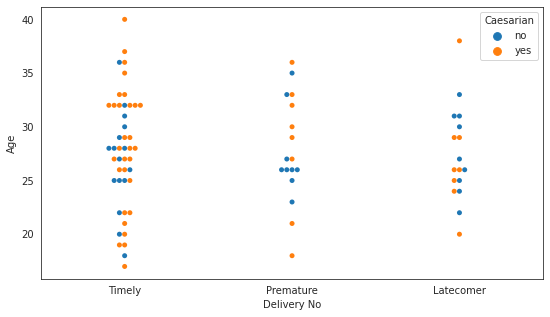

In [ ]:
plt.figure(figsize=(9,5))

sns.swarmplot(x='Delivery No', y='Age', hue='Caesarian', data=data)
plt.show()

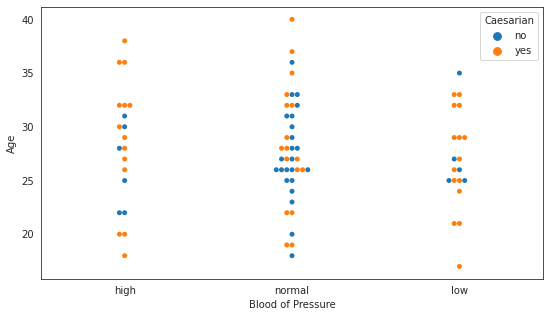

In [ ]:
plt.figure(figsize=(9,5))

sns.swarmplot(x='Blood of Pressure', y='Age', hue='Caesarian', data=data)
plt.show()

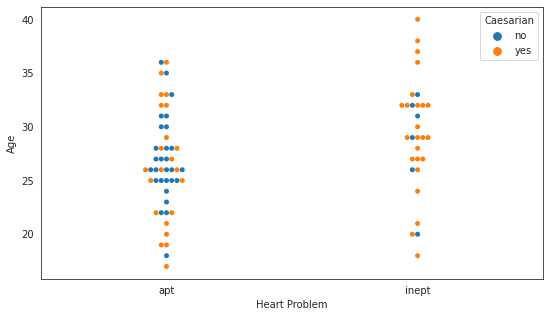

In [ ]:

plt.figure(figsize=(9,5))

sns.swarmplot(x='Heart Problem', y='Age', hue='Caesarian', data=data)
plt.show()

In [ ]:
data.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,high,apt,no
1,26,2,Timely,normal,apt,yes
2,26,2,Premature,normal,apt,no
3,28,1,Timely,high,apt,no
4,22,2,Timely,normal,apt,yes


In [ ]:
cesaria = pd.DataFrame(np.copy(data), columns=data.columns)

cesaria.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,high,apt,no
1,26,2,Timely,normal,apt,yes
2,26,2,Premature,normal,apt,no
3,28,1,Timely,high,apt,no
4,22,2,Timely,normal,apt,yes


In [ ]:
cesaria.columns

Index(['Age', 'Delivey No', 'Delivery No', 'Blood of Pressure',
       'Heart Problem', 'Caesarian'],
      dtype='object')

In [ ]:
cesaria = cesaria.drop('Delivey No', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(cesaria.Caesarian)

cesaria.Caesarian = le.transform(cesaria.Caesarian)

In [ ]:
cesaria.head()
'''
Caesarian 0=No; 1=Yes

'''

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,high,apt,0
1,26,Timely,normal,apt,1
2,26,Premature,normal,apt,0
3,28,Timely,high,apt,0
4,22,Timely,normal,apt,1


In [ ]:
data.duplicated().value_counts()

False    76
True      4
dtype: int64

In [112]:
cesaria = cesaria.drop_duplicates()

In [114]:
cesaria.to_csv('cesaria.csv')

In [123]:
cesaria['Delivery No'].unique()

array(['Timely', 'Premature', 'Latecomer'], dtype=object)

In [128]:
# Latecomer -> llegada tardia
# Timely -> llegada oportuna
# Premature -> llegada antes de tiempo

0    9
1    7
Name: Caesarian, dtype: int64

In [144]:
delivery = pd.get_dummies(cesaria['Delivery No'])

problemheart = pd.get_dummies(cesaria['Heart Problem'], drop_first=True)

bp = pd.get_dummies(cesaria['Blood of Pressure'])

In [147]:
frame = [cesaria.Age, delivery, bp, problemheart, data['Caesarian']]

cesarea = pd.concat(frame, axis=1)

In [159]:
cesarea.head()

cesarea.columns = ['edad', 'nac_despues', 'nac_antes', 'nac_oportuno', 'bp_alto', 'bp_bajo', 'bp_normal', 'enf_corazon', 'target']

In [152]:
cesarea.to_csv('cesarea_fin.csv')

In [157]:
le.fit(cesarea.target)

cesarea.target = le.transform(cesarea.target)

In [160]:
cesarea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          72 non-null     object 
 1   nac_despues   72 non-null     float64
 2   nac_antes     72 non-null     float64
 3   nac_oportuno  72 non-null     float64
 4   bp_alto       72 non-null     float64
 5   bp_bajo       72 non-null     float64
 6   bp_normal     72 non-null     float64
 7   enf_corazon   72 non-null     float64
 8   target        80 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.2+ KB


In [164]:
cesarea = cesarea.dropna()

In [167]:
cesarea.edad = cesarea.edad.astype('int')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [168]:
cesarea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 79
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          72 non-null     int64  
 1   nac_despues   72 non-null     float64
 2   nac_antes     72 non-null     float64
 3   nac_oportuno  72 non-null     float64
 4   bp_alto       72 non-null     float64
 5   bp_bajo       72 non-null     float64
 6   bp_normal     72 non-null     float64
 7   enf_corazon   72 non-null     float64
 8   target        72 non-null     int64  
dtypes: float64(7), int64(2)
memory usage: 5.6 KB


In [170]:
cesarea.to_csv('cesareaFinal.csv')

In [171]:
cesarea.columns

Index(['edad', 'nac_despues', 'nac_antes', 'nac_oportuno', 'bp_alto',
       'bp_bajo', 'bp_normal', 'enf_corazon', 'target'],
      dtype='object')

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = cesarea.loc[:,['edad', 'nac_despues', 'nac_antes', 'nac_oportuno', 'bp_alto',
       'bp_bajo', 'bp_normal', 'enf_corazon']]

y = cesarea.loc[:, ['target']]

X = X/np.max(X)

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [232]:
y_train.value_counts(), y_test.value_counts()

(target
 1         29
 0         21
 dtype: int64, target
 1         12
 0         10
 dtype: int64)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

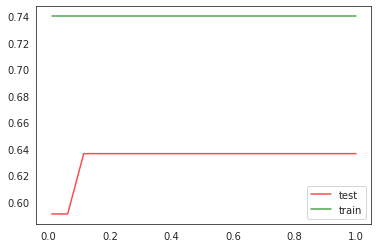

In [259]:
c = np.linspace(0.01,1,20)

train = []
test = []

for i in c:

  lr = LogisticRegression(C=i, penalty='l2', solver='newton-cg', max_iter=100, multi_class='auto', class_weight='balanced').fit(X_train, y_train)

  pred = lr.predict(X_test)

  _pred = lr.predict(X_train)

  test.append(accuracy_score(y_test, pred))

  train.append(accuracy_score(y_train, _pred))

plt.plot(c, test, c='red', alpha=0.7, label='test')
plt.plot(c, train, c='green', alpha=0.7, label='train')
plt.legend(loc='best')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

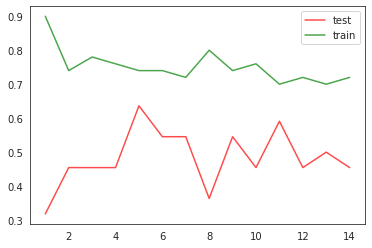

In [271]:
from sklearn.neighbors import KNeighborsClassifier

k = np.arange(1,15)

train= []
test = []

for _ in k:

  knn = KNeighborsClassifier(n_neighbors=_, weights='uniform').fit(X_train, y_train)
  pred = knn.predict(X_test)
  _pred = knn.predict(X_train)

  test.append(accuracy_score(y_test, pred))

  train.append(accuracy_score(y_train, _pred))

plt.plot(k, test, c='red', alpha=0.7, label='test')
plt.plot(k, train, c='green', alpha=0.7, label='train')
plt.legend(loc='best')
plt.show()

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
accuracies = cross_val_score(rf, X_train, y_train, cv=5)
rf.fit(X_train, y_train)

print(np.mean(accuracies))
print(rf.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.56
0.3181818181818182


In [282]:
from sklearn.model_selection import GridSearchCV

grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(X_train,y_train)


print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Hyperparameters: {'criterion': 'gini', 'n_estimators': 100}
Train Score: 0.56
Test Score: 0.3181818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

In [4]:
#liblinear regresion logistica

ruta = r'/content/cesareaFinal.csv'

data = pd.read_csv(ruta)

In [13]:
#data = data.drop('Unnamed: 0', axis=1)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          72 non-null     int64  
 1   nac_despues   72 non-null     float64
 2   nac_antes     72 non-null     float64
 3   nac_oportuno  72 non-null     float64
 4   bp_alto       72 non-null     float64
 5   bp_bajo       72 non-null     float64
 6   bp_normal     72 non-null     float64
 7   enf_corazon   72 non-null     float64
 8   target        72 non-null     int64  
dtypes: float64(7), int64(2)
memory usage: 5.2 KB


In [54]:
X = pd.DataFrame(np.copy(data.loc[:, ['edad',	'nac_despues', 'nac_antes',	'nac_oportuno',	'bp_alto',	'bp_bajo',	'bp_normal',	'enf_corazon']]))
y = pd.DataFrame(np.copy(data.target))

In [55]:
X = X/np.max(X)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, test_size=0.3)

y_train.value_counts(), y_test.value_counts()

(1    30
 0    20
 dtype: int64, 1    11
 0    11
 dtype: int64)

In [57]:
lr = LogisticRegression(solver='liblinear', fit_intercept=True,)
acc = cross_val_score(lr, X_train, y_train, cv=5)
lr.fit(X_train, y_train)

print(np.mean(acc))
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.6399999999999999
0.6818181818181818
0.7


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [58]:
params = {'solver':['liblinear','saga', 'newton-cg', 'lbfgs'], 'C': np.arange(0.001, 1, 15),
          }

Lr = LogisticRegression(fit_intercept=True, class_weight='balanced')
lr_cv = GridSearchCV(Lr, params, cv=5)
lr_cv.fit(X_train, y_train)

print(lr_cv.best_params_)

print(lr_cv.best_score_)

print(lr_cv.score(X_test, y_test))

{'C': 0.001, 'solver': 'newton-cg'}
0.6
0.6818181818181818


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [91]:
logre = LogisticRegression(C=0.01, solver='newton-cg', fit_intercept=True, class_weight='balanced',
                           penalty='l2').fit(X_train, y_train)

pred = logre.predict(X_test)
_pred = logre.predict(X_train)
cm_lr = confusion_matrix(y_test, pred)
_cm_lr = confusion_matrix(y_train, _pred)
print('\t\t\\t\t\tTEST')
print(logre.score(X_test, y_test))
print(classification_report(y_test, pred))
print('-'*100)
print('\t\t\\t\t\tTRAIN')
print(logre.score(X_train, y_train))
print(classification_report(y_train, _pred))


		\t		TEST
0.6818181818181818
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.70      0.64      0.67        11

    accuracy                           0.68        22
   macro avg       0.68      0.68      0.68        22
weighted avg       0.68      0.68      0.68        22

----------------------------------------------------------------------------------------------------
		\t		TRAIN
0.74
              precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.81      0.73      0.77        30

    accuracy                           0.74        50
   macro avg       0.73      0.74      0.73        50
weighted avg       0.75      0.74      0.74        50



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


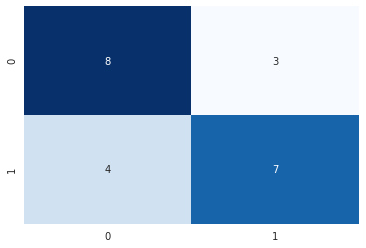

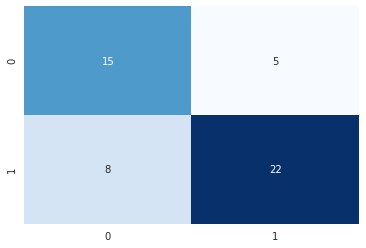

In [86]:
sns.heatmap(cm_lr, annot=True, cbar=False, cmap='Blues')
plt.show()
sns.heatmap(_cm_lr, annot=True, cbar=False, cmap='Blues')
plt.show()

In [85]:
cross_val_score(logre, X, y, cv=4)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.55555556, 0.77777778, 0.83333333, 0.55555556])